In [5]:
!pip install tensorflow

In [6]:
!nvidia-smi


Thu Feb  1 08:01:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [7]:
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.15.0
GPU available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
import tensorflow as tf

# Create a random matrix
a = tf.random.normal((1000, 1000))

# Perform a matrix multiplication on GPU
b = tf.matmul(a, a)

print("GPU computation time:", b)


GPU computation time: tf.Tensor(
[[ 23.644073  -53.09984     4.4855604 ...  44.762833   15.747591
  -27.254604 ]
 [ 17.465328  -10.247104  -48.122856  ...   9.175959   20.489845
   40.124718 ]
 [ -5.5265207  32.026146   31.498093  ...  40.996006   36.62998
   69.20412  ]
 ...
 [  3.4558582  45.48342     5.707222  ... -24.857723   46.83235
  -18.666574 ]
 [ -1.7733288 -16.848602    9.835978  ...  57.113823    7.558341
  -18.197208 ]
 [  6.84245     9.575052   66.461     ...   9.252407   49.378075
   30.718555 ]], shape=(1000, 1000), dtype=float32)


In [10]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [11]:
## import some basics libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [13]:
dataset=pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
##Divide the dataset into independent and dependent features
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [15]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [16]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [19]:
##Feature Engineering

geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [23]:
##Concatenate these variables with dataframe

X=X.drop(['Geography','Gender'],axis=1)

In [24]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [26]:
X=pd.concat([X,geography,gender],axis=1)

In [28]:
#Splitting the dataset into Training set and Test Set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)


In [30]:
##Feature scaling

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [31]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [32]:
X_test

array([[ 5.97000000e+02,  3.50000000e+01,  8.00000000e+00, ...,
         1.00000000e+00, -7.10542736e-18, -4.17443857e-17],
       [ 5.23000000e+02,  4.00000000e+01,  2.00000000e+00, ...,
         5.77315973e-17, -7.10542736e-18, -4.17443857e-17],
       [ 7.06000000e+02,  4.20000000e+01,  8.00000000e+00, ...,
         5.77315973e-17,  1.00000000e+00, -4.17443857e-17],
       ...,
       [ 5.78000000e+02,  3.60000000e+01,  1.00000000e+00, ...,
         5.77315973e-17,  1.00000000e+00,  1.00000000e+00],
       [ 6.50000000e+02,  3.40000000e+01,  4.00000000e+00, ...,
         1.00000000e+00, -7.10542736e-18,  1.00000000e+00],
       [ 5.73000000e+02,  3.00000000e+01,  8.00000000e+00, ...,
         1.00000000e+00, -7.10542736e-18,  1.00000000e+00]])

In [33]:
X_train.shape

(8000, 11)

In [34]:
## Part2- Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [35]:
###lets initialize the ANN

Classifier=Sequential()

In [36]:
## Adding the imput Layer
Classifier.add(Dense(units=11,activation='relu'))

In [39]:
##Adding the first hidden layer
Classifier.add(Dense(units=7,activation='relu'))

In [41]:
#adding the second hudden layer
Classifier.add(Dense(units=6,activation='relu'))

In [42]:
#adding output layer
Classifier.add(Dense(1,activation='sigmoid'))

In [47]:
Classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [52]:
##Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [53]:
model_history=Classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3216 - accuracy: 0.8630 - val_loss: 0.3729 - val_accuracy: 0.8501
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3203 - accuracy: 0.8668 - val_loss: 0.3670 - val_accuracy: 0.8519
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3216 - accuracy: 0.8632 - val_loss: 0.3639 - val_accuracy: 0.8508
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3201 - accuracy: 0.8645 - val_loss: 0.3787 - val_accuracy: 0.8410
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3211 - accuracy: 0.8591 - val_loss: 0.3655 - val_accuracy: 0.8512
Epoch 6/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3202 - accuracy: 0.8636 - val_loss: 0.3651 - val_accuracy: 0.8508
Epoch 7/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3209 - accuracy: 0.8630 - val_loss: 0.3669 - val_accuracy:

In [55]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

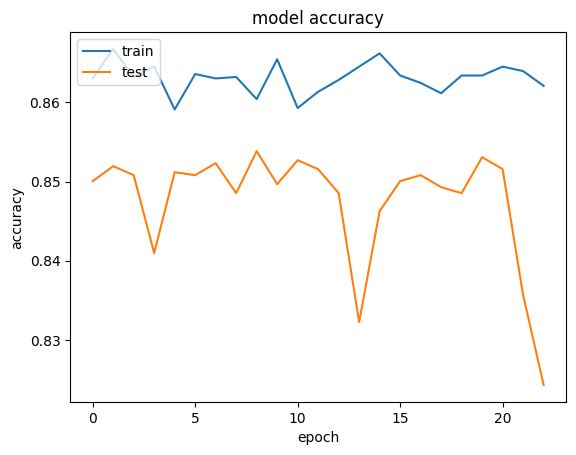

In [56]:
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

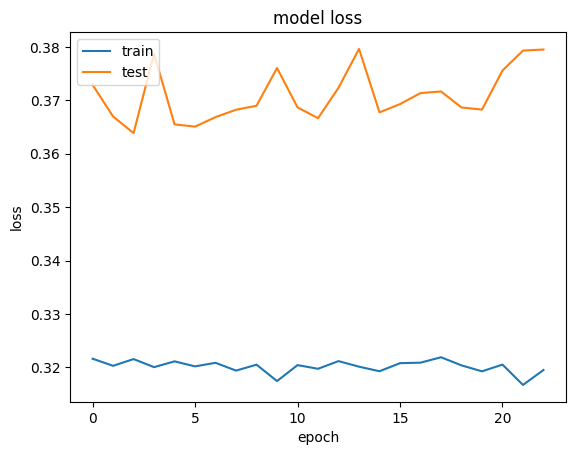

In [57]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [59]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = Classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 4ms/step


In [61]:
## make the confusion metrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm


array([[730, 865],
       [139, 266]])

In [62]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [64]:
score

0.498

In [65]:
## get the weights
Classifier.get_weights()

[array([[-6.72509551e-01, -1.84281871e-01,  1.12500034e-01,
         -1.81433892e+00, -8.09982002e-01,  1.76370156e+00,
          2.31279278e+00, -5.47874928e-01,  2.78982568e+00,
         -8.15676376e-02, -2.19630742e+00],
        [ 4.70728397e+00, -3.89807850e-01, -4.09404993e+00,
         -2.07181364e-01,  2.88580871e+00, -1.16329718e+00,
         -3.05263829e+00, -2.11800814e+00,  1.81204987e+00,
          1.05808757e-03, -2.98090363e+00],
        [-2.85697073e-01,  6.20624185e-01,  4.66723025e-01,
          1.75992215e+00,  4.37421829e-01,  1.16838582e-01,
         -8.64167035e-01,  2.99453640e+00,  3.56366873e+00,
         -1.84047893e-01,  2.27878761e+00],
        [-1.02047884e+00, -4.06635571e+00, -8.81114721e-01,
          1.57106626e+00, -1.12913764e+00, -2.75600582e-01,
          2.89875650e+00,  9.60043252e-01,  7.88069069e-01,
          1.57982016e+00,  3.26408362e+00],
        [-3.52437019e+00, -5.48682070e+00,  9.12325382e-01,
          3.52715421e+00, -1.69791281e-01,  